In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df = pd.read_csv("saukhichinhsua.csv")

In [ ]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,annual_inc_categories,loan_amnt_categories,interest_rate_categories,dti_categories
0,2500,2500,2500.0,60 months,15.27,C,C4,1,RENT,30000.0,...,3,0,1687,9.4,4,0.0,20000-40000,0-7000,12.5-16,0-5
1,2400,2400,2400.0,36 months,15.96,C,C5,10,RENT,12252.0,...,2,0,2956,98.5,10,0.0,0-20000,0-7000,12.5-16,5-10
2,10000,10000,10000.0,36 months,13.49,C,C1,10,RENT,49200.0,...,10,0,5598,21.0,37,0.0,40000-60000,7000-14000,12.5-16,15-20
3,5000,5000,5000.0,36 months,7.90,A,A4,3,RENT,36000.0,...,9,0,7963,28.3,12,0.0,20000-40000,0-7000,0-10,10-15
4,7000,7000,7000.0,60 months,15.96,C,C5,8,RENT,47004.0,...,7,0,17726,85.6,11,0.0,40000-60000,0-7000,12.5-16,25+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35087,3000,3000,2225.0,36 months,7.75,A,A3,9,OWN,50000.0,...,17,0,21050,0.7,29,0.0,40000-60000,0-7000,0-10,5-10
35088,3000,3000,2975.0,36 months,7.75,A,A3,10,OWN,125000.0,...,15,0,21050,1.0,24,0.0,80000+,0-7000,0-10,0-5
35089,4000,4000,1475.0,36 months,10.91,C,C3,1,RENT,18000.0,...,4,0,5533,79.6,5,0.0,0-20000,0-7000,10-13,15-20
35090,2000,2000,475.0,36 months,8.70,B,B1,1,RENT,70000.0,...,13,0,5967,19.8,17,0.0,60000-80000,0-7000,0-10,5-10


In [ ]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [ ]:
df['loan_status']

,loan_status
0,0
1,1
2,1
3,1
4,1
...,...
35087,1
35088,1
35089,1
35090,1


In [ ]:
df['term'] = df['term'].map({' 36 months':1,' 60 months':0})

In [ ]:
df['purpose']

,purpose
0,car
1,small_business
2,other
3,wedding
4,debt_consolidation
...,...
35087,vacation
35088,home_improvement
35089,car
35090,credit_card


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35092 entries, 0 to 35091
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   35092 non-null  int64  
 1   funded_amnt                 35092 non-null  int64  
 2   funded_amnt_inv             35092 non-null  float64
 3   term                        35092 non-null  int64  
 4   int_rate                    35092 non-null  float64
 5   grade                       35092 non-null  object 
 6   sub_grade                   35092 non-null  object 
 7   emp_length                  35092 non-null  int64  
 8   home_ownership              35092 non-null  object 
 9   annual_inc                  35092 non-null  float64
 10  verification_status         35092 non-null  object 
 11  issue_d                     35092 non-null  object 
 12  loan_status                 35092 non-null  int64  
 13  purpose                     350

In [ ]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,annual_inc_categories,loan_amnt_categories,interest_rate_categories,dti_categories
0,2500,2500,2500.0,0,15.27,C,C4,1,RENT,30000.0,...,3,0,1687,9.4,4,0.0,20000-40000,0-7000,12.5-16,0-5
1,2400,2400,2400.0,1,15.96,C,C5,10,RENT,12252.0,...,2,0,2956,98.5,10,0.0,0-20000,0-7000,12.5-16,5-10
2,10000,10000,10000.0,1,13.49,C,C1,10,RENT,49200.0,...,10,0,5598,21.0,37,0.0,40000-60000,7000-14000,12.5-16,15-20
3,5000,5000,5000.0,1,7.90,A,A4,3,RENT,36000.0,...,9,0,7963,28.3,12,0.0,20000-40000,0-7000,0-10,10-15
4,7000,7000,7000.0,0,15.96,C,C5,8,RENT,47004.0,...,7,0,17726,85.6,11,0.0,40000-60000,0-7000,12.5-16,25+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35087,3000,3000,2225.0,1,7.75,A,A3,9,OWN,50000.0,...,17,0,21050,0.7,29,0.0,40000-60000,0-7000,0-10,5-10
35088,3000,3000,2975.0,1,7.75,A,A3,10,OWN,125000.0,...,15,0,21050,1.0,24,0.0,80000+,0-7000,0-10,0-5
35089,4000,4000,1475.0,1,10.91,C,C3,1,RENT,18000.0,...,4,0,5533,79.6,5,0.0,0-20000,0-7000,10-13,15-20
35090,2000,2000,475.0,1,8.70,B,B1,1,RENT,70000.0,...,13,0,5967,19.8,17,0.0,60000-80000,0-7000,0-10,5-10


In [ ]:
df['loan_status'].value_counts()



,count
loan_status,
1,30078
0,5014


In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from datetime import datetime

# Xác định các cột số và cột phân loại
numeric_cols = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
    'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'collections_12_mths_ex_med'
]
categorical_cols = [
    'grade', 'sub_grade', 'home_ownership', 'verification_status',
    'issue_d', 'purpose', 'addr_state', 'earliest_cr_line'
]

# Tách X, y
X = df.drop(['loan_status', 'title'], axis=1)
y = df['loan_status']

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Chuyển đổi cột earliest_cr_line sang số năm
def extract_year(value):
    try:
        year = int(value[-2:])
        return datetime.now().year - (1900 + year if year > 30 else 2000 + year)
    except:
        return None

X_train["earliest_cr_line"] = X_train["earliest_cr_line"].apply(extract_year)
X_test["earliest_cr_line"] = X_test["earliest_cr_line"].apply(extract_year)

# Chuẩn hóa dữ liệu số
scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_num_scaled = scaler.transform(X_test[numeric_cols])

# Mã hóa dữ liệu phân loại
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train_cat_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_cat_encoded = encoder.transform(X_test[categorical_cols])

# Gộp dữ liệu
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

# Huấn luyện mô hình
model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced")
model.fit(X_train_final, y_train)

# Dự đoán & Đánh giá
y_pred = model.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.856817210428836
              precision    recall  f1-score   support

           0       0.40      0.00      0.01      1003
           1       0.86      1.00      0.92      6016

    accuracy                           0.86      7019
   macro avg       0.63      0.50      0.47      7019
weighted avg       0.79      0.86      0.79      7019



In [ ]:
y_test.value_counts()

,count
loan_status,
1,6016
0,1003


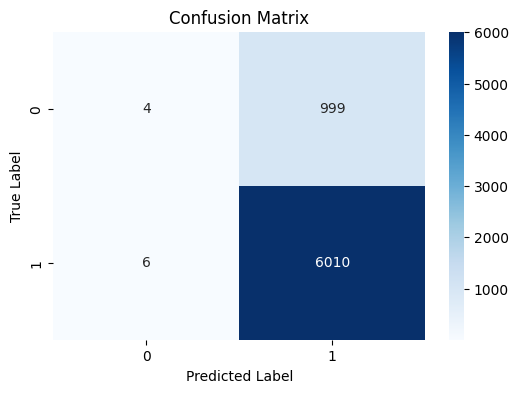

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dự đoán trên tập test
y_pred = model.predict(X_test_final)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from xgboost import XGBClassifier

model_XG = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
                      n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

model_XG.fit(X_train_final, y_train)
y_pred = model_XG.predict(X_test_final)

print(classification_report(y_test, y_pred, digits=4))



              precision    recall  f1-score   support

           0     0.2405    0.5533    0.3352      1003
           1     0.9049    0.7086    0.7948      6016

    accuracy                         0.6864      7019
   macro avg     0.5727    0.6310    0.5650      7019
weighted avg     0.8100    0.6864    0.7291      7019



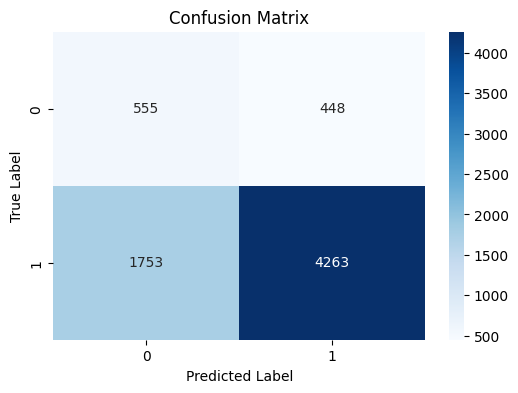

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dự đoán trên tập test
y_pred = model_XG.predict(X_test_final)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Create Logistics Regression model from X and y
lg = LogisticRegression()
lg.fit(X_train_final, y_train)  # training

# TRAIN set
predictions = lg.predict(X_train_final)  # prediction label
predictions_proba = lg.predict_proba(X_train_final)  # prediction probability
print("Log loss on train set: %f" % log_loss(y_train, predictions_proba))
print("Accuracy score on train set: %f" % accuracy_score(y_train, predictions))
print("-" * 50)

# TEST set
predictions_test = lg.predict(X_test_final)  # prediction label []
predictions_proba_test = lg.predict_proba(X_test_final)  # prediction probability
print("Log loss on test set: %f" % log_loss(y_test, predictions_proba_test))
print("Accuracy score on test set: %f" % accuracy_score(y_test, predictions_test))

# Show parameters
print("w = ", lg.coef_)
print("b = ", lg.intercept_)

Log loss on train set: 0.378917
Accuracy score on train set: 0.856659
--------------------------------------------------
Log loss on test set: 0.379836
Accuracy score on test set: 0.855820
w =  [[-0.56563889 -0.52786645  0.54077237  0.54337616 -0.64933795  1.96421815
  -0.18345867  0.04563001 -1.21133123 -0.08235697 -0.49546374 -0.31439688
  -0.54232666  0.1784286   0.          0.09514045 -0.05313532 -0.00200407
  -0.02810036 -0.00455727 -0.04790398  0.00383392 -0.01282362]]
b =  [2.45461497]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# import joblib

# # Lưu mô hình
# joblib.dump(model_XG, "XG_Boost.pkl")

# print("✅ Mô hình đã lưu thành công!")


✅ Mô hình đã lưu thành công!
